# Explore weather trends
For this project i used Pyhton, Pandas and Matplotlib.
The data came from a SQL databse.
Each step taken to prepare and visualize the data is described below.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


## Import csv data
The data was obtained using the following SQL statements
1. Global data: select * from global_data
2. Local data: select * from city_data where country like 'Germany'

In [2]:
global_data = pd.read_csv("global.csv")
local_data = pd.read_csv("germany.csv")

## Check if there are any null values

In [3]:
global_data.isna().any()

year        False
avg_temp    False
dtype: bool

In [4]:
local_data.isna().any()

year        False
city        False
country     False
avg_temp     True
dtype: bool

## Print the null values
To decide how to handle missing values i extracted them from the dataset.

In [5]:
null_values = local_data[local_data.isnull().any(axis=1)]
null_values

,year,city,country,avg_temp
3,1746,Berlin,Germany,NaN
4,1747,Berlin,Germany,NaN
5,1748,Berlin,Germany,NaN
6,1749,Berlin,Germany,NaN
274,1746,Hamburg,Germany,NaN
275,1747,Hamburg,Germany,NaN
276,1748,Hamburg,Germany,NaN
277,1749,Hamburg,Germany,NaN
545,1746,Munich,Germany,NaN
546,1747,Munich,Germany,NaN


## Drop missing years and create subdata for each city.
For each city the same 4 years are missing. The global data set starts at 1750 and the missing values are before that year so i decided to drop them. First I splitted the german dataset into the different cities and then dropped the first rows.

In [6]:
berlin_data = local_data[local_data['city'] == 'Berlin']

In [7]:
berlin_data = berlin_data[berlin_data['year'] > 1749]

In [8]:
berlin_data = berlin_data.reset_index(drop=True)

In [9]:
hamburg_data = local_data[local_data['city'] == 'Hamburg']

In [10]:
hamburg_data = hamburg_data[hamburg_data['year'] > 1749]

In [11]:
hamburg_data = hamburg_data.reset_index(drop=True)

In [12]:
munich_data = local_data[local_data['city'] == 'Munich']

In [13]:
munich_data = munich_data[munich_data['year'] > 1749]

In [14]:
munich_data = munich_data.reset_index(drop=True)

In [15]:
global_data = global_data[global_data['year'] > 1749]

## Plot Data
The average temperature for each dataset is plottet with a rolling mean of 10 years using Pandas built in methods.

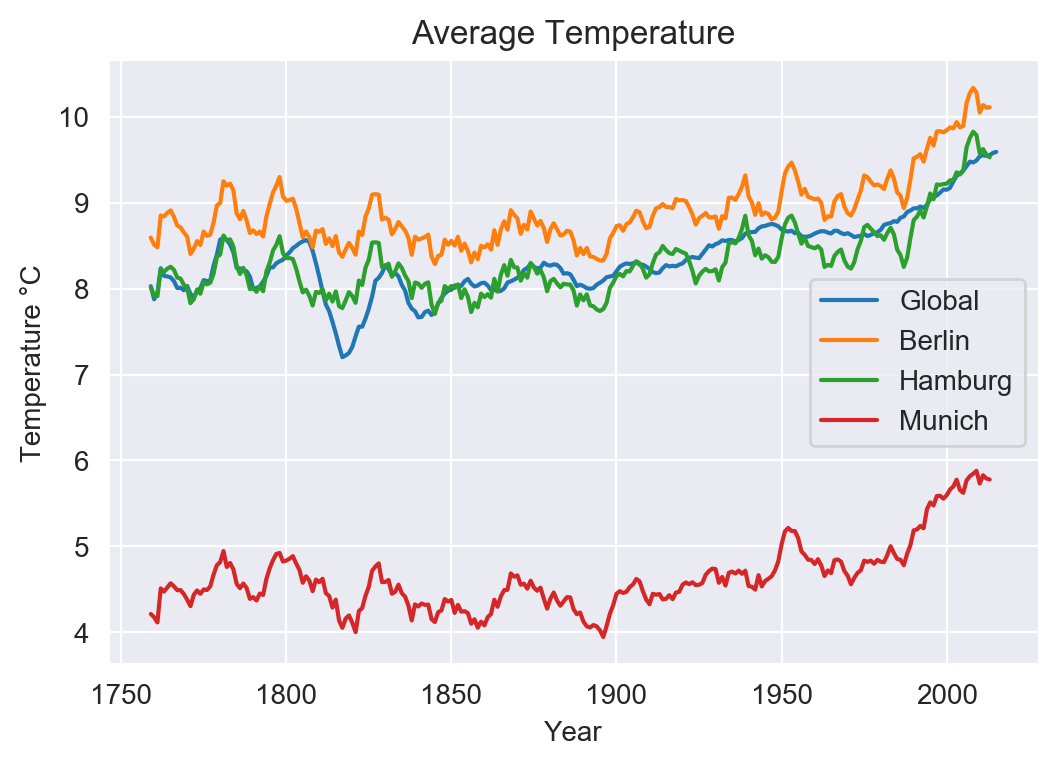

In [16]:
fig, ax = plt.subplots()

fig.dpi = 100

ax.plot(global_data['year'], global_data['avg_temp'].rolling(10).mean(), label="Global")
ax.plot(berlin_data['year'], berlin_data['avg_temp'].rolling(10).mean(), label="Berlin")
ax.plot(hamburg_data['year'], hamburg_data['avg_temp'].rolling(10).mean(), label="Hamburg")
ax.plot(munich_data['year'], munich_data['avg_temp'].rolling(10).mean(), label="Munich")

ax.legend()

ax.set_title("Average Temperature")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature °C")

plt.show()

## Observations

1. All curves look similiar and you can see an ongoing increase in the average temeprature starting around the year 1900.
2. The temperature in Berlin is a bit higher than the global trend and Munich is about 4 degrees colder, only Hamburg is fitting the global trend.
3. Hamburg and Berlin are in the nothern part of Germany, so it looks like the temperatures in nothern Germany are higher than in the south.


To see if the average temperature in Germany is higher or lower than the global one i built the mean over all cities. Unfortunetaly the dataset contains only three cities, so the result is not that compelling.

In [17]:
german_average = pd.concat((berlin_data, munich_data, hamburg_data)).groupby(level=0).mean()

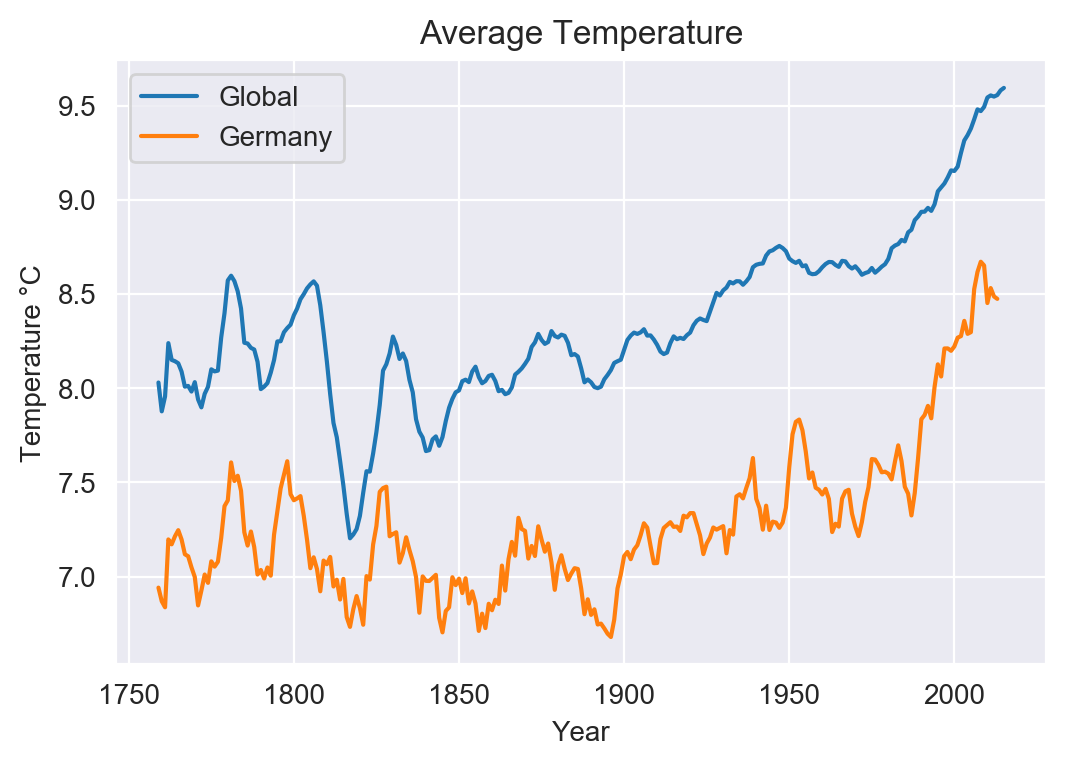

In [18]:
fig, ax = plt.subplots()

fig.dpi = 100

ax.plot(global_data['year'], global_data['avg_temp'].rolling(10).mean(), label="Global")
ax.plot(german_average['year'], german_average['avg_temp'].rolling(10).mean(), label="Germany")

ax.legend()

ax.set_title("Average Temperature")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature °C")

plt.show()

Overall Germany seems to be colder than the average.

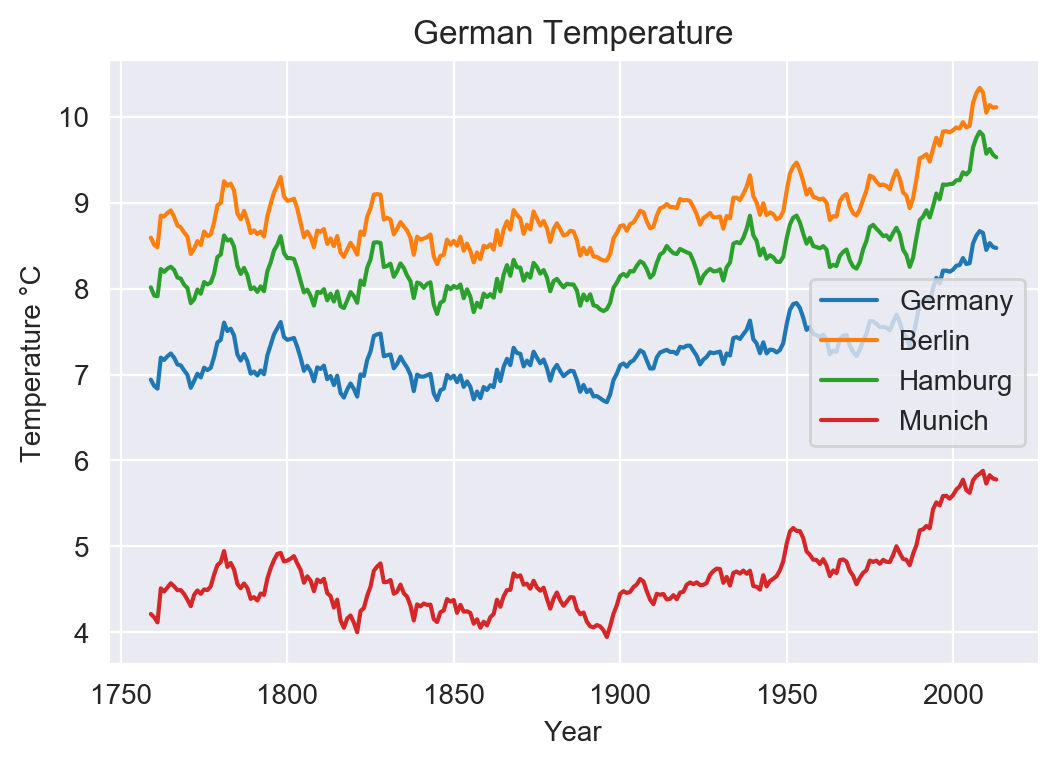

In [19]:
fig, ax = plt.subplots()

fig.dpi = 100

ax.plot(german_average['year'], german_average['avg_temp'].rolling(10).mean(), label="Germany")
ax.plot(berlin_data['year'], berlin_data['avg_temp'].rolling(10).mean(), label="Berlin")
ax.plot(hamburg_data['year'], hamburg_data['avg_temp'].rolling(10).mean(), label="Hamburg")
ax.plot(munich_data['year'], munich_data['avg_temp'].rolling(10).mean(), label="Munich")

ax.legend()

ax.set_title("German Temperature")
ax.set_xlabel("Year")
ax.set_ylabel("Temperature °C")

plt.show()